In [14]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import random

In [15]:
##1D random walk
#input the probability of going right
print("Probability of going to the right direction:")
p = float(input("p = "))

Probability of going to the right direction:


In [16]:

T = 10000
N = 20000

In [17]:

x = np.random.random((N, T)) < p
rand_steps = x.astype(int)
rand_steps[rand_steps==0] = -1 #going left = -1
rand_steps[:, 0] = 0 #initial location
rand_walk = np.cumsum(rand_steps, axis=1)
t = np.arange(0, T)

In [18]:

ave = np.mean(rand_walk, axis=0) #average of location
var = np.var(rand_walk, axis=0) #variance

In [19]:
#best fit
b1, m1 = polyfit(t, ave, 1)

b2, m2 = polyfit(t, var, 1)

print(m1, m2)

-0.7999432682799087 0.36086274905718807


In [20]:
# average and variance from theory
ave_t = (2*p-1)*t
var_t = 4*p*(1-p)*t

In [21]:

error1 = ((2*p-1)-m1)/(2*p-1)

error2= (4*p*(1-p)-m2)/(4*p*(1-p))

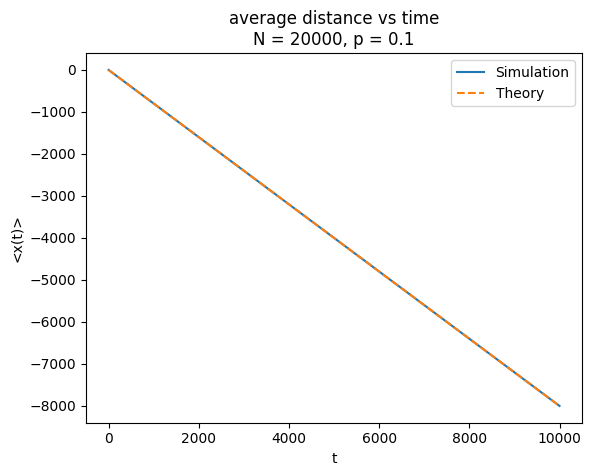

Relative error: 7.091465011418996e-05


In [22]:
plt.plot(t, ave, label='Simulation')
plt.plot(t, ave_t, '--', label='Theory')
plt.xlabel('t')
plt.ylabel('<x(t)>')
plt.title('average distance vs time\nN = %s, p = %s'%(N, p))
plt.legend()
plt.show()
print('Relative error: %s'%(error1))

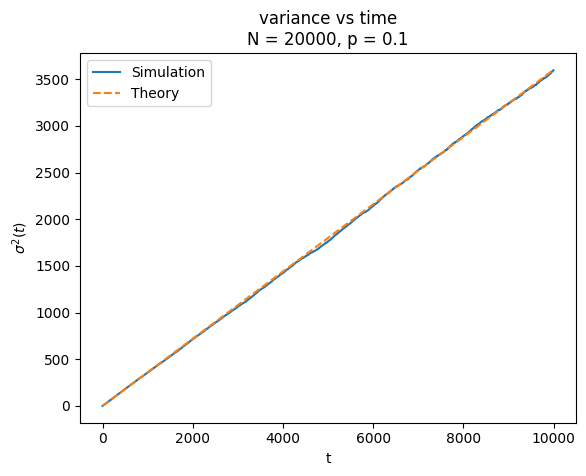

Relative error: -0.002396525158855633


In [23]:
plt.plot(t, var, label='Simulation')
plt.plot(t, var_t, '--', label='Theory')
plt.xlabel('t')
plt.ylabel('$\sigma^2(t)$')
plt.title('variance vs time\nN = %s, p = %s'%(N, p))
plt.legend()
plt.show()
print('Relative error: %s'%(error2))

In [24]:
##absorbing boundary
#function that get location and probability and return the time that random walker survive
def life_time(x, p):

    t = 0 #initial time

    #absorbing points
    while x != 0 and x != 21:
        t += 1
        a = np.random.choice([1, -1], p=[p, (1-p)]) #choosing next step
        x += a

    return t

In [25]:
p_s = np.linspace(0, 1, 11)
x_s = np.linspace(1, 20, 20)
t = np.zeros((len(p_s), len(x_s), N))

In [26]:
for i, p in enumerate(p_s):
    for j, x in enumerate(x_s):
        for k in range(N):
            t[i, j, k] = life_time(x, p)

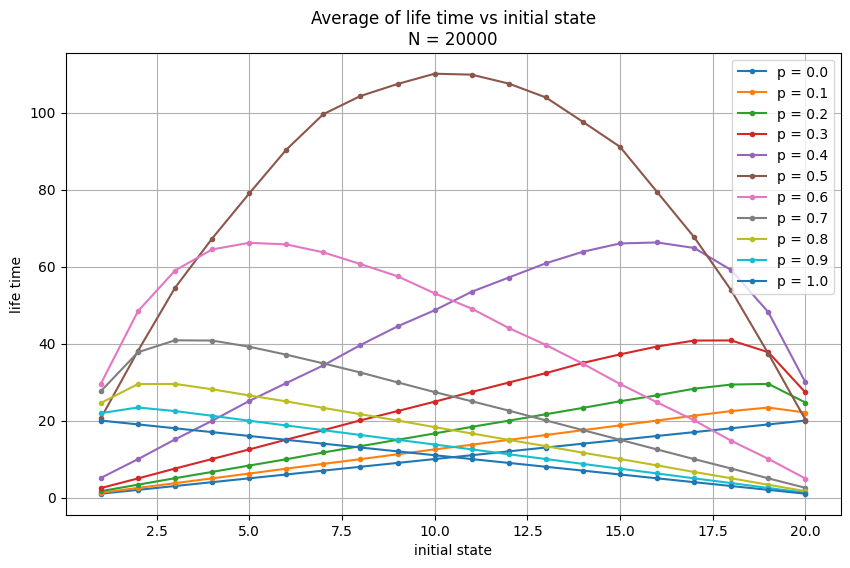

In [27]:
t_s = np.mean(t, axis=2)
plt.figure(figsize=(10, 6))
for i in range(len(p_s)):
    plt.plot(x_s, t_s[i], '.-', label='p = %s' % (np.round(p_s[i], 1)))

plt.xlabel('initial state')
plt.ylabel('life time')
plt.title("Average of lifetime vs initial state\nN = %s" % N)
plt.grid(True)
plt.legend()
plt.show()

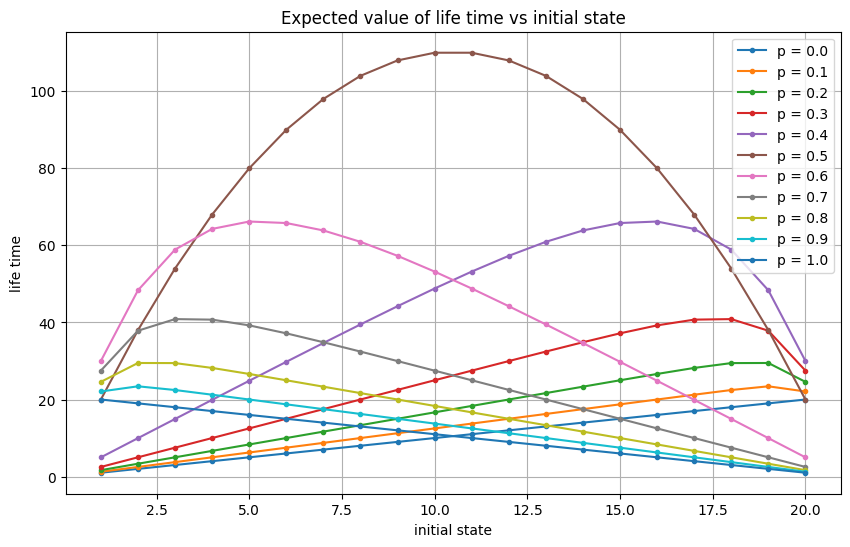

In [28]:
#deterministic approach
def shift(arr, num):
    result = np.empty_like(arr)

    if num > 0:
        result[:num] = 0
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = 0
        result[:num] = arr[-num:]
    else:
        result[:] = arr

    return result


def EV_life_time(x_i, p):
    x = np.zeros(20)  #probability of existence
    x[x_i] = 1  #in the first location at step 0, the probability of existence is 1.
    t = 0  #initial time
    life_time = np.zeros(3000)

    while sum(x) > 0.0000000001:
        death_pr = (x[0]) * (1 - p) + (x[-1]) * p #probability of death
        t += 1
        #calculating probabilities
        life_time[t] = t * death_pr
        r = p * shift(x, 1)  #going right
        l = (1 - p) * shift(x, -1)  #going left
        x = np.add(r, l)

    E_life_time = sum(life_time)

    return E_life_time


p_s = np.linspace(0, 1, 11)
x_s = np.linspace(1, 20, 20, dtype=int)
t_s = np.zeros((len(p_s), len(x_s))) #average of lifetime
for i, p in enumerate(p_s):
    for j, x in enumerate(x_s):
        t_s[i, j] = EV_life_time((x - 1), p)
plt.figure(figsize=(10, 6))
for i in range(len(p_s)):
    plt.plot(x_s, t_s[i], '.-', label='p = %s' % (np.round(p_s[i], 1)))

plt.xlabel('initial state')
plt.ylabel('life time')
plt.title("Expected value of life time vs initial state")
plt.grid(True)
plt.legend()
plt.show()

In [29]:
##2-D random walk
p = 0.5
#developing 2-D random walker
def random_walk(location_x, location_y):
    move = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    phase = random.choice(move)
    new_x = location_x + phase[0]
    new_y = location_y + phase[1]
    # if new_x > size - 1:
    #     new_x -= size - 1
    # if new_x < 0:
    #     new_x = size - 1
    # if new_y >= height:
    #     new_y = height - 1
    return new_x, new_y

In [34]:
#2-D random walker pattern
init_x = 0
init_y = 0
next_x, next_y = random_walk(init_x, init_y)
arr_x = np.zeros(N)
arr_y = np.zeros(N)
arr_x[0] = next_x
arr_y[0] = next_y
for i in range(N//4):
    arr_x[i], arr_y[i] = random_walk(arr_x[i-1], arr_y[i-1])

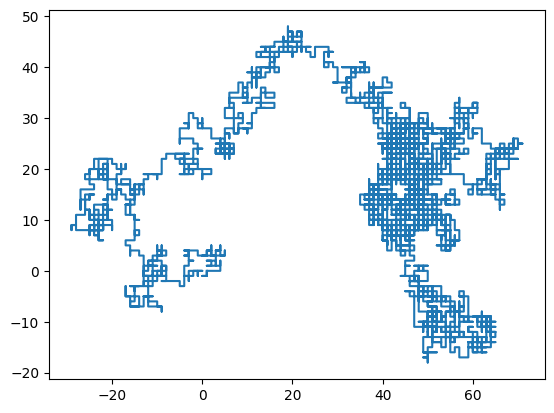

In [35]:
plt.plot(arr_x,arr_y)
plt.show()

In [64]:
#DLA Algorithm
size = 200
height = 50

init_network = np.zeros((size, height))
for i in range(size):
    init_network[-i, 0] = 1

def check(x, y):
    if x > size - 1:
        x -= size - 1
    if x< 0:
        x = size - 1
    if y >= height:
        y = height - 1
    return x, y

def algorithm():
    x = []
    y = []
    for k in range(N//10):
        loc_x = random.randint(0, size)
        x_new, y_new = random_walk(loc_x, height)
        x_new, y_new = check(x_new, y_new)
        while True:
            x_new1, y_new1 = random_walk(x_new, y_new)
            x_new1, y_new1 = check(x_new1, y_new1)
            if init_network[x_new1][y_new1] == 1:
                init_network[x_new][y_new] = 1
                x.append(x_new)
                y.append(y_new)
                break
            else:
                x_new = x_new1
                y_new = y_new1
    return init_network



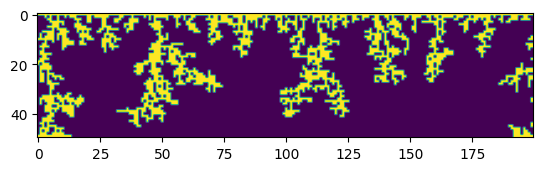

In [65]:
DLA = algorithm()
plt.imshow(DLA.T)
plt.show()